## Acceptance Rate By Date

Calculate the friend acceptance rate for each date when friend requests were sent. A request is sent if *action = sent* and accepted if *action = accepted*. If a request is not accepted, there is no record of it being accepted in the table.
The output will only include dates where requests were sent and at least one of them was accepted (acceptance can occur on any date after the request is sent).

https://platform.stratascratch.com/coding/10285-acceptance-rate-by-date?code_type=3

In [ ]:
select * 
from fb_friend_requests
WHERE action = 'accepted';

SELECT *
FROM fb_friend_requests
WHERE action = 'sent';

WITH request AS (
    SELECT *
    FROM fb_friend_requests
    WHERE action = 'sent'
), result AS (
    SELECT * 
    FROM fb_friend_requests
    WHERE action = 'accepted'
)
SELECT *
FROM request r
    RIGHT JOIN result ra ON r.user_id_sender = ra.user_id_sender; 

In [ ]:
WITH request AS (
    SELECT *
    FROM fb_friend_requests
    WHERE action = 'sent'
), result AS (
    SELECT * 
    FROM fb_friend_requests
    WHERE action = 'accepted'
)
SELECT *
FROM result ra
    RIGHT JOIN request r ON r.user_id_sender = ra.user_id_sender 
                            AND r.user_id_receiver = ra.user_id_receiver; 

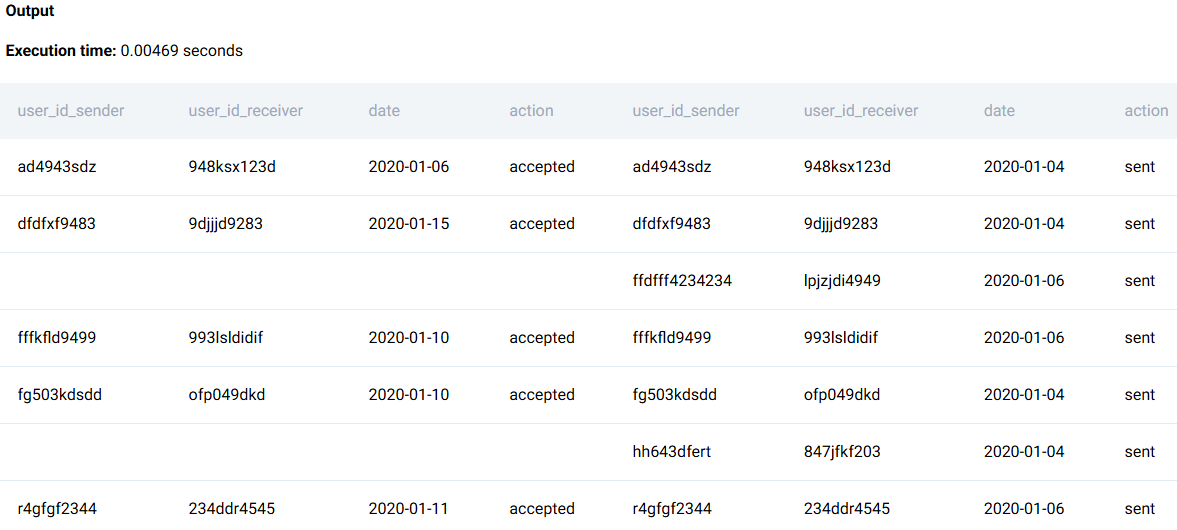

In [ ]:
WITH request AS (
    SELECT *
    FROM fb_friend_requests
    WHERE action = 'sent'
), result AS (
    SELECT * 
    FROM fb_friend_requests
    WHERE action = 'accepted'
)
SELECT r.date, 
        COUNT(r.user_id_sender) as request, 
        COUNT(ra.user_id_receiver) as accepted
FROM result ra
    RIGHT JOIN request r ON r.user_id_sender = ra.user_id_sender 
                            AND r.user_id_receiver = ra.user_id_receiver
GROUP BY r.date; 

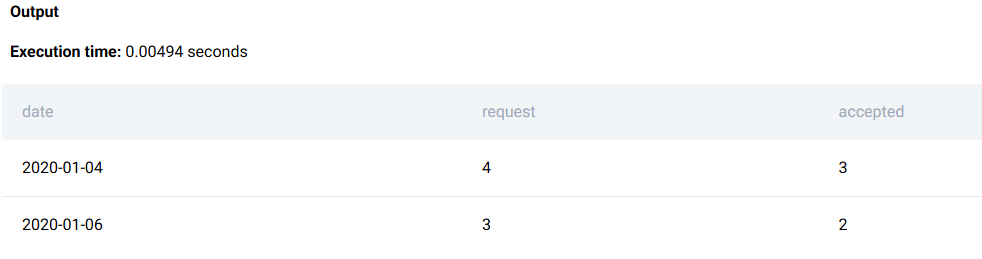

In [ ]:
WITH request AS (
    SELECT *
    FROM fb_friend_requests
    WHERE action = 'sent'
), result AS (
    SELECT * 
    FROM fb_friend_requests
    WHERE action = 'accepted'
)
SELECT r.date,  COUNT(ra.user_id_receiver)/COUNT(r.user_id_sender)
FROM result ra
    RIGHT JOIN request r ON r.user_id_sender = ra.user_id_sender 
                            AND r.user_id_receiver = ra.user_id_receiver
GROUP BY r.date; 